# Data preparation for automated text classification for ICD 9 diagnosis code assignment from MIMIC Database

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

Load MIMIC tables NOTEEVENTS and DIAGNOSES_ICD

In [2]:
NOTEEVENTS=pd.read_csv('./data/NOTEEVENTS.csv',dtype={'ROW_ID':np.int32, 'SUBJECT_ID': np.int32,'HADM_ID': np.float64,
                                       'CHARTDATE':str,'STORETIME':str,'CHARTTIME':str,
                                       'STORETIME': str,'CATEGORY': str,'DESCRIPTION':str,'CGID':str,'ISERROR':str,
                                        'TEXT':str}, parse_dates=['CHARTDATE'])
DIAGNOSES_ICD=pd.read_csv('./data/DIAGNOSES_ICD.csv',dtype={'ROW_ID':np.int32, 'SUBJECT_ID': np.int32,'HADM_ID': np.int32,
                                            'SEQ_NUM':  np.float64,'ICD9_CODE':str})

## Explore NOTEEVENTS

In [3]:
NOTEEVENTS.count()

ROW_ID         2083180
SUBJECT_ID     2083180
HADM_ID        1851344
CHARTDATE      2083180
CHARTTIME      1766614
STORETIME      1246404
CATEGORY       2083180
DESCRIPTION    2083180
CGID           1246404
ISERROR            886
TEXT           2083180
dtype: int64

In [4]:
NOTEEVENTS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [5]:
NOTEEVENTS.groupby('CATEGORY').count()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,DESCRIPTION,CGID,ISERROR,TEXT
CATEGORY,,,,,,,,,,
Case Management,967,967,954,967,967,967,967,967,14,967
Consult,98,98,98,98,98,98,98,98,0,98
Discharge summary,59652,59652,59652,59652,0,0,59652,0,0,59652
ECG,209051,209051,138190,209051,0,0,209051,0,0,209051
Echo,45794,45794,34037,45794,0,0,45794,0,0,45794
General,8301,8301,8209,8301,8260,8301,8301,8301,65,8301
Nursing,223556,223556,220758,223556,222172,223556,223556,223556,374,223556
Nursing/other,822497,822497,821258,822497,822497,822497,822497,822497,0,822497
Nutrition,9418,9418,9378,9418,9411,9418,9418,9418,18,9418


## Explore DIAGNOSES_ICD

In [6]:
DIAGNOSES_ICD['ICD9_CODE']=DIAGNOSES_ICD['ICD9_CODE'].str.pad(4,'left','0')
DIAGNOSES_ICD['ICD9_CHAP']=DIAGNOSES_ICD['ICD9_CODE'].str.slice(0,3)
DIAGNOSES_ICD.count()

ROW_ID        651047
SUBJECT_ID    651047
HADM_ID       651047
SEQ_NUM       651000
ICD9_CODE     651000
ICD9_CHAP     651000
dtype: int64

In [7]:
DIAGNOSES_ICD.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ICD9_CHAP
0,1297,109,172335,1.0,40301,403
1,1298,109,172335,2.0,0486,048
2,1299,109,172335,3.0,58281,582
3,1300,109,172335,4.0,5855,585
4,1301,109,172335,5.0,4254,425


In [8]:
##Explore by the first character
DIAGNOSES_ICD.groupby(DIAGNOSES_ICD['ICD9_CODE'].str.slice(0,1))['HADM_ID'].count()

ICD9_CODE
0     42765
1     12322
2    106309
3     38668
4    142137
5     91067
6      6989
7     71110
8     15112
9     27606
E     22544
V     74371
Name: HADM_ID, dtype: int64

Codes from V,E,U,8,9 can be exclude in a purpose of facturation as they are not take in count for the calculus of hospitalization fees.

In [9]:
DIAGNOSES_ICD=DIAGNOSES_ICD[~DIAGNOSES_ICD['ICD9_CODE'].str.slice(0,1).isin(['V','E','U','8','9'])]

## Exploration of diagnoses to choose the perfect y
### Selection of the most frequent codes

In [10]:
a=DIAGNOSES_ICD.groupby('ICD9_CODE')['HADM_ID'].count().sort_values(ascending=False)

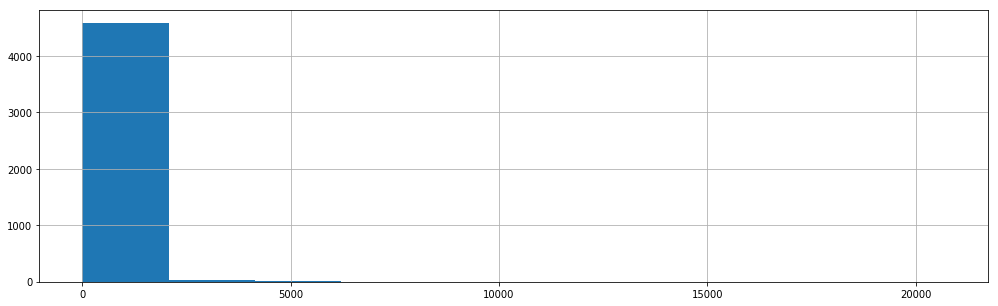

In [11]:
a.hist(figsize= (17, 5))

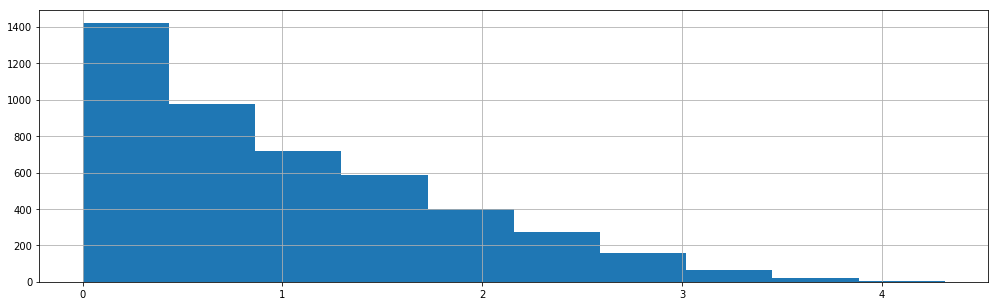

In [12]:
np.log10(a).hist(figsize= (17, 5))

Due to dispersion of the distribution and the low frequency of some code, for the machine learning task a selection of the code and their chapter will be made

In [13]:
print('Nb codes > 1000 occurences= '+str(len(a[a>1000]))+
      '  \nNb codes 1000-100 occurences = ' +str(len(a[(a<1000)&(a>100)]))
      +'  \nNb codes <100 occurences = ' +str(len(a[a<100])) )

Nb codes > 1000 occurences= 98  
Nb codes 1000-100 occurences = 557  
Nb codes <100 occurences = 3970


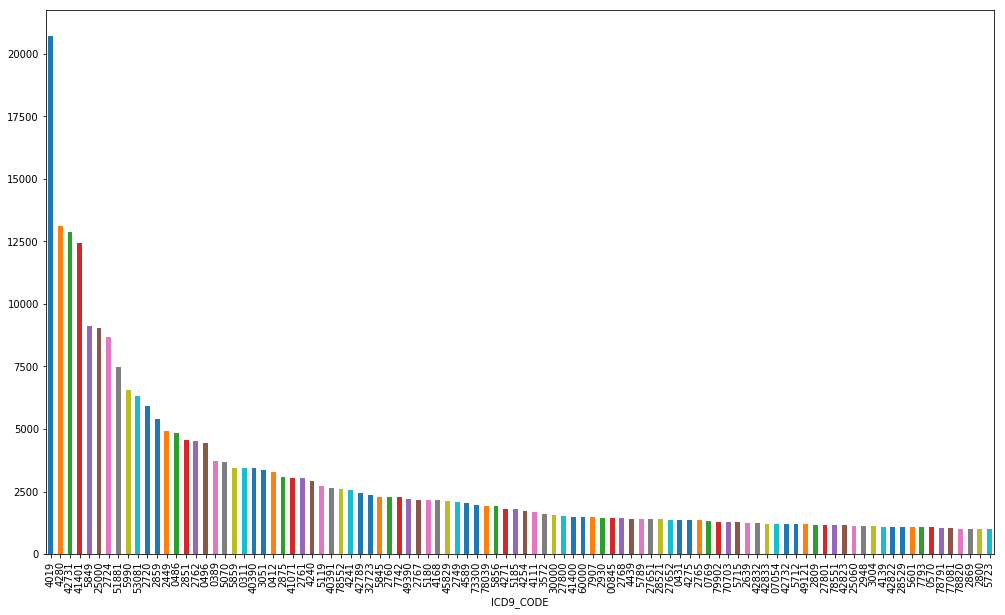

In [14]:
a[a>1000].plot(kind='bar',figsize= (17, 10))

In [15]:
a=DIAGNOSES_ICD.groupby('ICD9_CODE')[ 'HADM_ID'].count()
DIAGNOSES_ICD_freq=DIAGNOSES_ICD[DIAGNOSES_ICD['ICD9_CODE'].isin(a[a>1000].keys())]
df=DIAGNOSES_ICD_freq.groupby('HADM_ID')['ICD9_CODE'].apply(lambda x: "['%s']" %"','".join(x))
df=df.apply(lambda x : eval(x))
DIAGNOSES_ICD_freq=pd.DataFrame(df)
DIAGNOSES_ICD_freq['HADM_ID']=df.keys()
DIAGNOSES_ICD_freq.head()

,ICD9_CODE,HADM_ID
HADM_ID,,
100001,"[5849, 40390]",100001
100003,"[2851, 07054, 5715, 4019]",100003
100006,"[51881, 0486, 2761]",100006
100007,"[0486, 4019]",100007
100009,"[41401, 25000, 27800, 4111, 2859, 4019, 2720]",100009


Selection des séjours avec les codes les plus fréquents

In [16]:
print('Nb de séjours sélectionnés = '+str(DIAGNOSES_ICD_freq['HADM_ID'].nunique())+
      '  \nNb de codes différents = ' +str(len(a[a>1000])))

Nb de séjours sélectionnés = 51300  
Nb de codes différents = 98


### Selection of the most frequent chapters

In [17]:
a=DIAGNOSES_ICD.groupby('ICD9_CHAP')[ 'HADM_ID'].count().sort_values(ascending=False)

In [18]:
print('Nb codes de chapitres > 1000 occurences= '+str(len(a[a>1000]))+
      '  \nNb codes de chapitres 1000-100 occurences = ' +str(len(a[(a<1000)&(a>100)]))
      +'  \nNb codes de chapitres <100 occurences = ' +str(len(a[a<100])) )

Nb codes de chapitres > 1000 occurences= 109  
Nb codes de chapitres 1000-100 occurences = 201  
Nb codes de chapitres <100 occurences = 315


In [19]:
#a=DIAGNOSES_ICD[~DIAGNOSES_ICD['ICD9_CODE'].isin(DIAGNOSES_ICD_freq['ICD9_CODE'])].groupby('ICD9_CHAP')[ 'HADM_ID'].count()
a=DIAGNOSES_ICD.groupby('ICD9_CHAP')['HADM_ID'].count()
DIAGNOSES_ICD_chap_freq=DIAGNOSES_ICD[DIAGNOSES_ICD['ICD9_CHAP'].isin(a[a>1000].keys())]


Selection des séjours avec les codes appartenant aux les plus fréquents

In [20]:
print('Nb de séjours sélectionnés = '+str(DIAGNOSES_ICD_chap_freq['HADM_ID'].nunique())+
      '  \nNb de chapitres différents = ' +str(DIAGNOSES_ICD_chap_freq['ICD9_CHAP'].nunique()))

Nb de séjours sélectionnés = 54903  
Nb de chapitres différents = 109


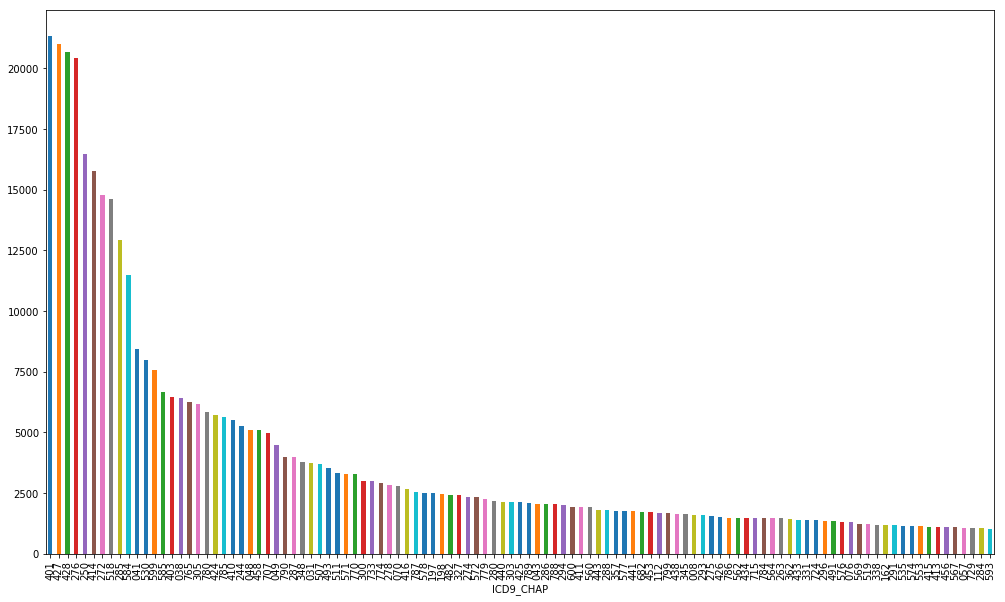

In [21]:
DIAGNOSES_ICD_chap_freq.groupby('ICD9_CHAP')['HADM_ID'].count().sort_values(ascending=False).plot(kind='bar',figsize= (17, 10))

In [22]:
df=DIAGNOSES_ICD_chap_freq.groupby('HADM_ID')['ICD9_CHAP'].apply(lambda x: "['%s']" %"','".join(x))
df=df.apply(lambda x : eval(x))
DIAGNOSES_ICD_chap_freq=pd.DataFrame(df)
DIAGNOSES_ICD_chap_freq['HADM_ID']=df.keys()
DIAGNOSES_ICD_chap_freq.head()

,ICD9_CHAP,HADM_ID
HADM_ID,,
100001,"[250, 584, 578, 250, 458, 250, 403, 585, 250, ...",100001
100003,"[285, 070, 571, 456, 401, 535]",100003
100006,"[493, 518, 048, 276, 785]",100006
100007,"[560, 048, 401]",100007
100009,"[414, 414, 250, 278, 414, 411, 285, 401, 272, ...",100009


### Conclusion : we will focus on ICD chapters.

## Build the final X and y

Merge of the most important notes to make a single text by hospitalisation.

In the first place we will focus on discharge summaries.

In [23]:
selected_doc=['Discharge summary']
df=NOTEEVENTS[NOTEEVENTS['CATEGORY'].isin(selected_doc)].groupby('HADM_ID')['TEXT'].apply(lambda x: "{%s}" % ', '.join(x))
df2=pd.DataFrame(df)
df2['HADM_ID']=df.keys()


Create one dataframe for selected diagnoses with merge with texts on HADM_ID, and the other one for selected chapters, and concatenate them to have the final dataframe that will be use for prediction

In [24]:
#NOTE_DIAGNOSES=pd.merge(df2,DIAGNOSES_ICD_freq[['HADM_ID','ICD9_CODE']],on='HADM_ID')
NOTE_DIAGNOSES=pd.merge(df2,DIAGNOSES_ICD_chap_freq[['HADM_ID','ICD9_CHAP']],on='HADM_ID')

In [25]:
NOTE_DIAGNOSES.head()

,TEXT,HADM_ID,ICD9_CHAP
0,{Admission Date: [**2117-9-11**] ...,100001,"[250, 584, 578, 250, 458, 250, 403, 585, 250, ..."
1,{Admission Date: [**2150-4-17**] ...,100003,"[285, 070, 571, 456, 401, 535]"
2,{Admission Date: [**2108-4-6**] Dischar...,100006,"[493, 518, 048, 276, 785]"
3,{Admission Date: [**2145-3-31**] ...,100007,"[560, 048, 401]"
4,{Admission Date: [**2162-5-16**] ...,100009,"[414, 414, 250, 278, 414, 411, 285, 401, 272, ..."


In [26]:
NOTE_DIAGNOSES.shape

(51817, 3)

In [27]:
from sklearn import model_selection
NOTE_DIAGNOSES.rename(columns={"ICD9_CHAP": "TARGET"}, inplace=True)
train, test = model_selection.train_test_split(NOTE_DIAGNOSES[['HADM_ID','TEXT','TARGET']],test_size=0.2)
print('Size of train: '+str(train.shape[0])+' \nSize of test: '+str(test.shape[0]) )

Size of train: 41453 
Size of test: 10364


In [46]:
train.to_csv('./data/train.csv',index=False)
test.to_csv('./data/test.csv',index=False)